# Import, options

In [2]:
import numpy, seaborn, pandas, gseapy
from gseapy.plot import gseaplot
import matplotlib, matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [4]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [5]:
#data DEseq HEK293 significant ones
df = pandas.read_csv(file_directory+'1) input/HEK293_temp_DESeq.csv',
                               sep = ',')
print(df.shape, '\n', df.columns)

# rename column
df = df.rename(columns = {'gene' : 'Symbol'})
df[['log2FoldChange','padj','Symbol']].sort_values('log2FoldChange', ascending = False)

(14335, 14) 
 Index(['Row.names', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'gene', '37deg', '37deg.1', '37deg.2', '32deg', '32deg.1',
       '32deg.2'],
      dtype='object')


,log2FoldChange,padj,Symbol
74,6.297662,0.012906,PRDM16
132,4.799382,0.042979,IL2RB
381,4.721328,0.192411,ZNF418
2549,4.141395,0.657117,CDK15
259,4.005342,0.124432,DUOX1
...,...,...,...
440,-3.092971,0.229273,LIN28A
350,-3.675033,0.179802,HYAL1
60,-5.052828,0.008506,FAM110A
111,-6.268118,0.027930,INSC


## Plot visualization

### all

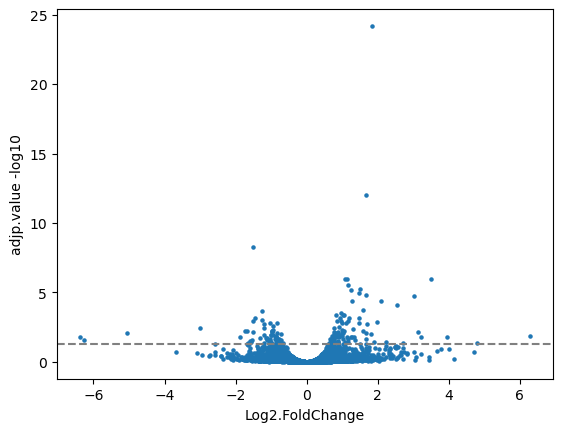

In [6]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df['log2FoldChange'], y=df['padj'].apply(lambda x:-numpy.log10(x)),s=5)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")

### Significant ones

In [7]:
# keep padj < 0.05
df_signif = df[df['padj'] < 0.05]
df_signif.shape

(145, 14)

In [8]:
df_signif[['log2FoldChange','padj','Symbol']].head()

,log2FoldChange,padj,Symbol
0,1.851678,6.554549e-25,SRSF5
1,1.667631,1.024723e-12,FANCB
2,-1.511831,5.743420e-09,AC011043.1
3,1.089112,1.124862e-06,RBM3
4,1.128752,1.124862e-06,FAM110D


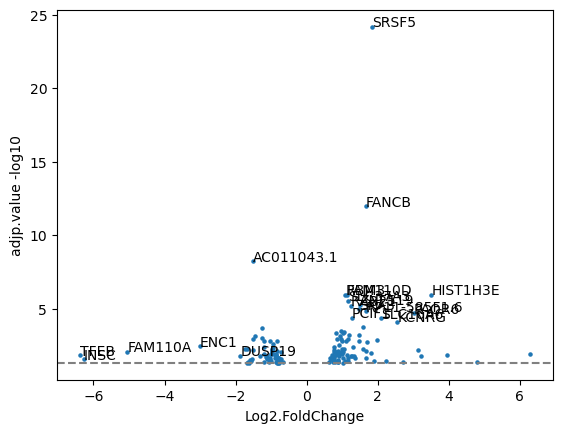

In [9]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
top_15 = df_signif.sort_values(by='padj', ascending=True).head(15)
topneg_5 = df_signif.sort_values(by='log2FoldChange', ascending=True).head(5)

plt.scatter(x=df_signif['log2FoldChange'], 
            y=df_signif['padj'].apply(lambda x:-numpy.log10(x)),s=5)

# Annotate points on the plot with Symbol names
for index, row in top_15.iterrows():
    plt.annotate(row['Symbol'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)
    
for index, row in topneg_5.iterrows():
    plt.annotate(row['Symbol'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")

In [10]:
# save to .txt the genes
## positive
# numpy.savetxt(file_directory+"3) output/top15_genes_HEK293.txt", 
#               top_15['Symbol'].unique(), delimiter="\t", fmt="% s")

# ## negative
# numpy.savetxt(file_directory+"3) output/top5_negative_genes_HEK293.txt", 
#               topneg_5['Symbol'].unique(), delimiter="\t", fmt="% s")

print(top_15[['log2FoldChange','padj','Symbol']].head(), '\n','\n',  topneg_5[['log2FoldChange','padj','Symbol']])

   log2FoldChange          padj      Symbol
0        1.851678  6.554549e-25       SRSF5
1        1.667631  1.024723e-12       FANCB
2       -1.511831  5.743420e-09  AC011043.1
3        1.089112  1.124862e-06        RBM3
4        1.128752  1.124862e-06     FAM110D 
 
      log2FoldChange      padj   Symbol
76        -6.391673  0.014863     TFEB
111       -6.268118  0.027930     INSC
60        -5.052828  0.008506  FAM110A
40        -3.006956  0.003779     ENC1
83        -1.864791  0.016056   DUSP19


## GSEA

In [11]:
# Tag % = % of gene hits before (for positive ES) or after (for negative ES) the peak
#         in the running enrichment score. This gives an indication of the percentage 
#         of genes contributing to the enrichment score.

# lead_genes: leading edge genes (gene hits before running enrichment peak)

### Preparation

In [12]:
# Rank and so GSEA plot will be based on Stat. More stat is high more it's diff expressed.
ranking = df[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
print(ranking.shape)

ranking = ranking.drop_duplicates('Symbol')
print(ranking.shape)
ranking

(14335, 2)
(14330, 2)


,Symbol,stat
0,SRSF5,11.191200
1,FANCB,8.264062
4,FAM110D,6.280882
5,HIST1H3E,6.243049
3,RBM3,6.230932
...,...,...
26,CHORDC1,-4.724351
25,GORAB,-4.765953
23,HIVEP2,-4.856568
16,MORC2,-5.160267


In [13]:
# default: Human
names = gseapy.get_library_name(organism='Human')
# names[:10]

### Cellular Component

2024-03-18 14:21:26,126 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term    Tag %  Gene %
0  GO_Cellular_Component_2023__Mitochondrial Inne...  153/311  24.98%
1  GO_Cellular_Component_2023__Organelle Inner Me...  159/329  24.98%
2  GO_Cellular_Component_2023__Respiratory Chain ...    33/41  25.83%


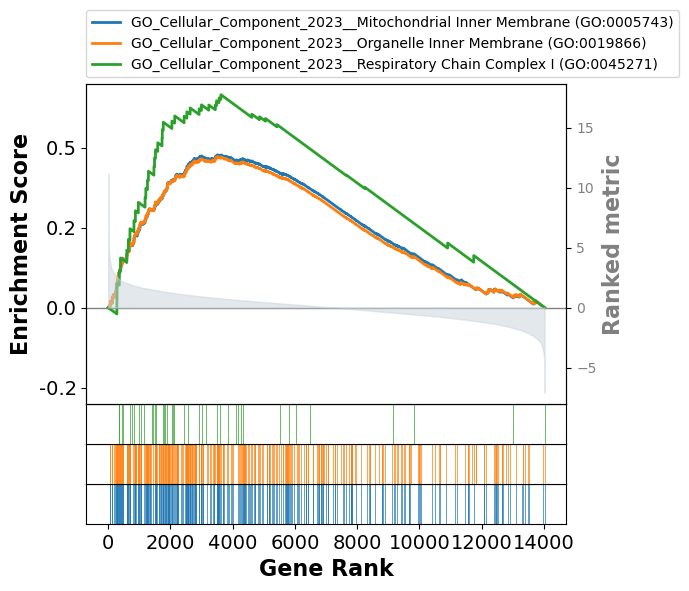

negative: 
 Term      GO_Cellular_Component_2023__Cul2-RING Ubiquiti...
Tag %                                                  5/19
Gene %                                               23.50%
Name: 223, dtype: object


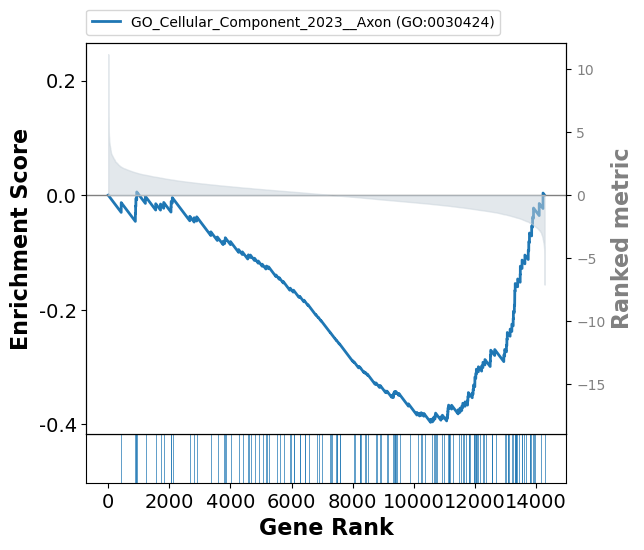

In [14]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()


# negative
print('negative: \n', pre_res.res2d.iloc[-1,[1,7,8]])
pre_res.plot(terms=terms[-1:])
plt.show()
plt.close()

### Cellular Component: Stress Granules

In [15]:
str_gr = terms[terms.str.contains('Stress Granule')].index
terms[terms.str.contains('Stress Granule')]

67    GO_Cellular_Component_2023__Cytoplasmic Stress...
Name: Term, dtype: object

2024-03-19 09:54:46,440 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Cellular_Component_2023__Cytoplasmic Stress...
Tag %                                                 22/68
Gene %                                               17.13%
Name: 67, dtype: object


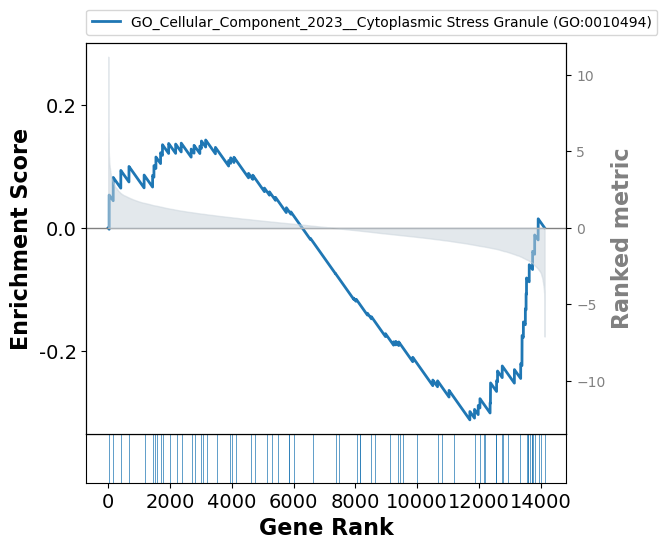

In [117]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

#only stress granules
print('negative: \n', pre_res.res2d.iloc[67,[1,7,8]])
pre_res.plot(terms = terms[str_gr])
plt.show()
plt.close()


In [17]:
lead_genes_GO_SG = pre_res.res2d.loc[pre_res.res2d.index[str_gr]].Lead_genes
lead_genes_GO_SG = lead_genes_GO_SG.str.split(';')
lead_genes_GO_SG.explode()

67     LIN28A
67      DYRK3
67      HIPK2
67     GIGYF2
67    IGF2BP2
67       PUM2
67       PUM1
67    IGF2BP3
67     PRKAA2
67       TIA1
67      ZNFX1
67      LARP1
67      G3BP1
67     LARP4B
67    IGF2BP1
67     ATXN2L
67       FMR1
67     YTHDF3
67      ZFP36
67      ROCK1
67     MCRIP2
67      TIAL1
Name: Lead_genes, dtype: object

In [18]:
# save to .txt the genes
numpy.savetxt(file_directory+"3) output/neg_stress_granules_genes_HEK293.txt", 
              lead_genes_GO_SG.explode(), delimiter="\t", fmt="% s")

In [19]:
# gene set from https://en.wikipedia.org/wiki/Stress_granule
stress_ganule_wikip = pandas.read_csv(file_directory+'1) input/stressganule_genes_wikip.csv', sep = ',')
print(len(stress_ganule_wikip))

723


2024-03-18 14:21:30,739 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


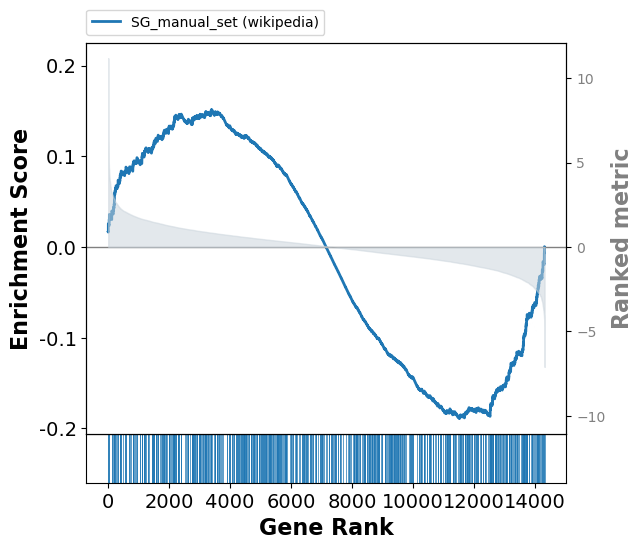

In [20]:
manual_set = {'SG_manual_set (wikipedia)': list(stress_ganule_wikip['Gene ID'])}
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                         gene_sets = manual_set,
                         seed = 6, permutation_num = 100,
                         min_size=5,
                         max_size=1000)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
pre_res.plot(terms=terms)
plt.show()
plt.close()


### Cellular Componant: P bodies

2024-03-19 10:02:56,322 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Cellular_Component_2023__P-body (GO:0000932)
Tag %                                               21/72
Gene %                                             22.73%
Name: 189, dtype: object


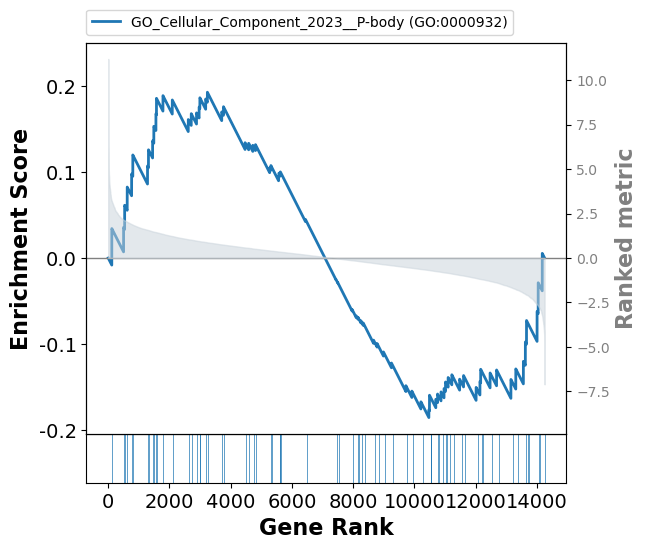

In [119]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

P_bodies = terms[terms.str.contains('P-body')].index

#only stress granules
print('negative: \n', pre_res.res2d.iloc[189,[1,7,8]])
pre_res.plot(terms = terms[P_bodies])
plt.show()
plt.close()


### Molecular Function

2024-03-18 14:22:39,714 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term  Tag %  Gene %
0  GO_Molecular_Function_2023__Oxidoreduction-Dri...  40/52  25.83%
1  GO_Molecular_Function_2023__NADH Dehydrogenase...  27/34  25.83%
2  GO_Molecular_Function_2023__NADH Dehydrogenase...  27/33  25.83%


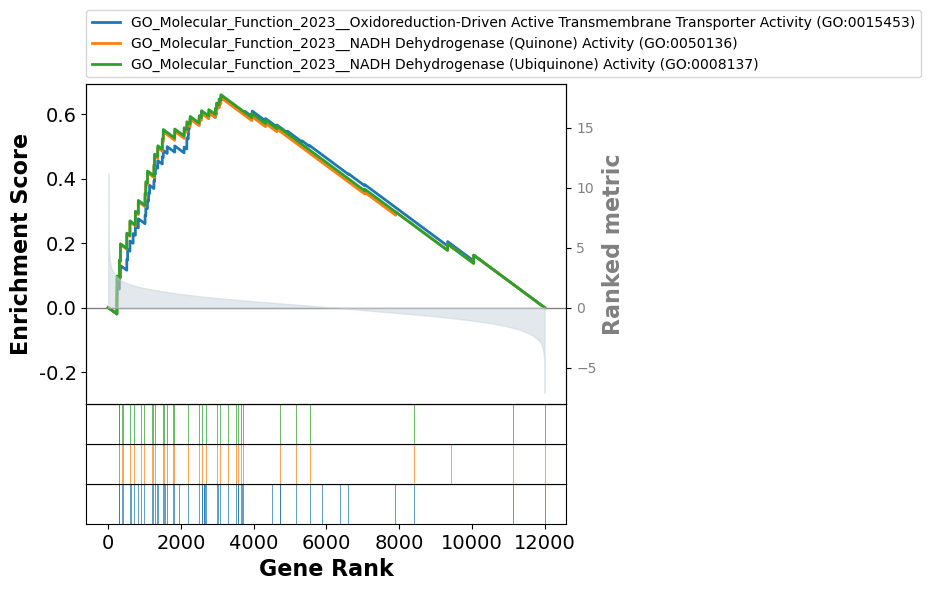

nothing interesting in negative


In [27]:
# GO_Molecular_Function_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Molecular_Function_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])

pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('nothing interesting in negative')

### Biological Process

2024-03-18 14:22:53,459 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term  Tag %  Gene %
0  GO_Biological_Process_2023__Mitochondrial ATP ...  50/67  25.83%
1  GO_Biological_Process_2023__Cellular Respirati...  56/81  25.83%
2  GO_Biological_Process_2023__Aerobic Electron T...  49/66  25.83%


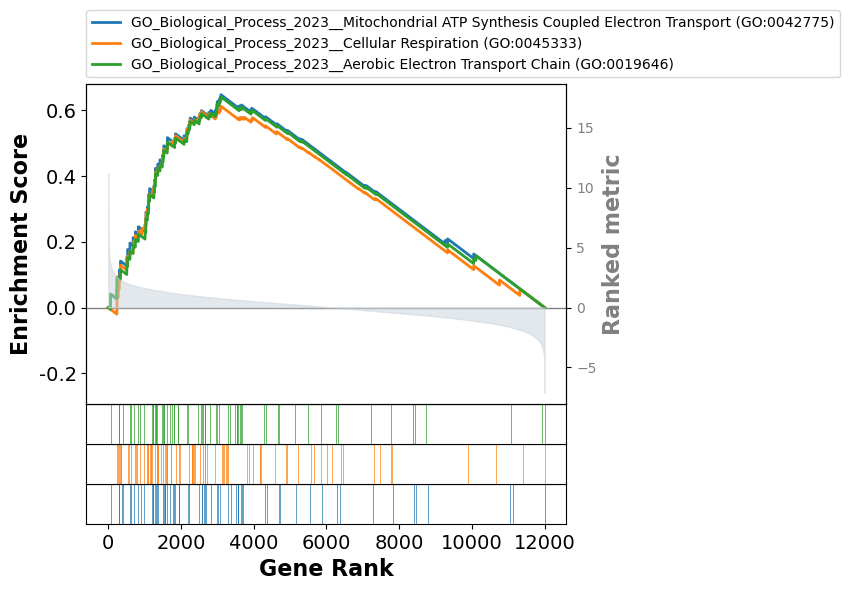

positive: 
                                                    Term  Tag %  Gene %
2092  GO_Biological_Process_2023__Positive Regulatio...  20/20  87.87%


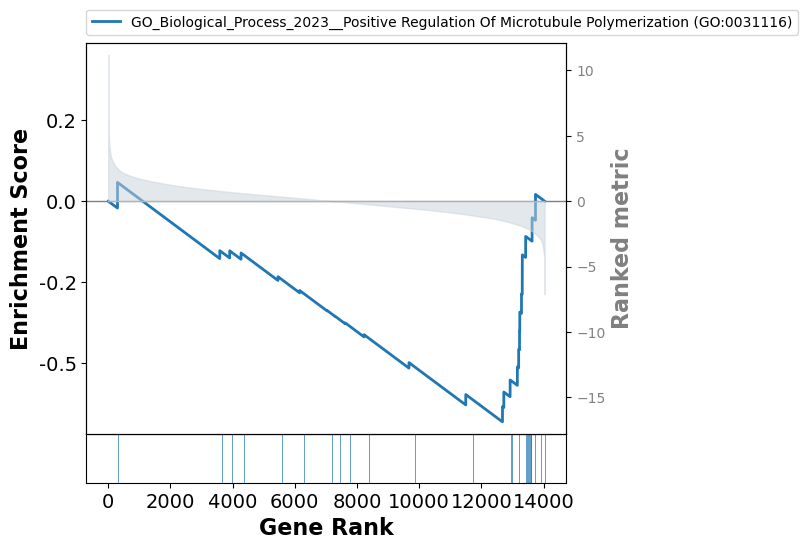

In [28]:
# GO_Biological_Process_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('positive: \n', pre_res.res2d.iloc[-1:,[1,7,8]])
pre_res.plot(terms=terms[-1:])
plt.show()
plt.close()

### mTOR _ GO_Biological_Process_2023

In [40]:
mtor_terms = terms[terms.str.contains('TOR')]

904     GO_Biological_Process_2023__Regulation Of TOR ...
1250    GO_Biological_Process_2023__TOR Signaling (GO:...
1510    GO_Biological_Process_2023__Positive Regulatio...
1816    GO_Biological_Process_2023__Negative Regulatio...
1857    GO_Biological_Process_2023__Negative Regulatio...
1564    GO_Biological_Process_2023__Regulation Of TORC...
1501    GO_Biological_Process_2023__Positive Regulatio...
Name: Term, dtype: object

2024-03-18 15:27:30,009 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Biological_Process_2023__Regulation Of TOR ...
Tag %                                                 18/64
Gene %                                               18.78%
Name: 904, dtype: object


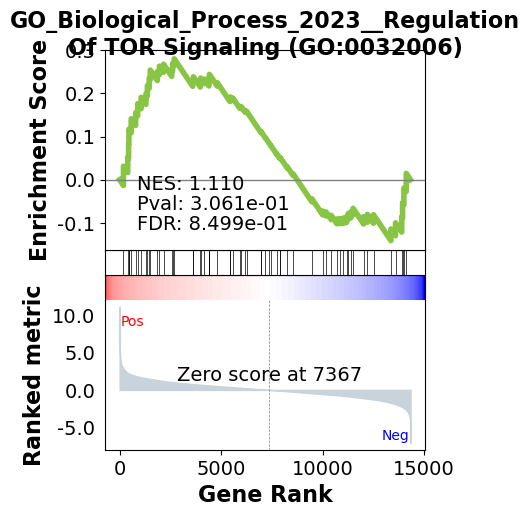

negative: 
 Term      GO_Biological_Process_2023__TOR Signaling (GO:...
Tag %                                                  6/27
Gene %                                               12.98%
Name: 1250, dtype: object


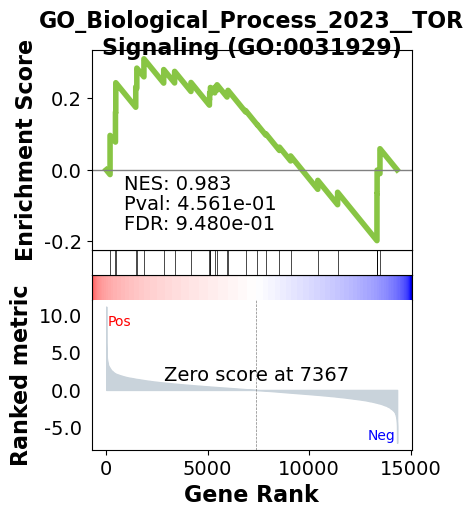

negative: 
 Term      GO_Biological_Process_2023__Positive Regulatio...
Tag %                                                  7/39
Gene %                                               12.98%
Name: 1510, dtype: object


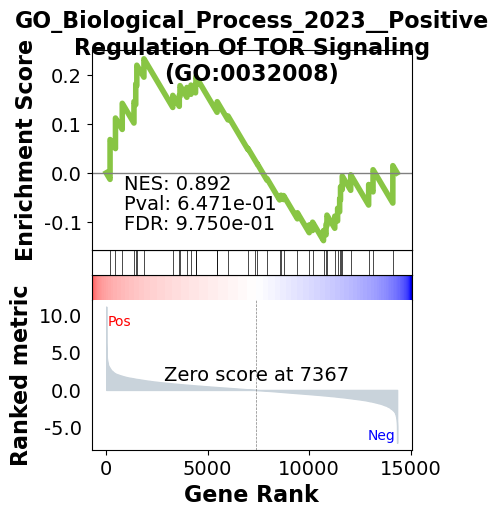

negative: 
 Term      GO_Biological_Process_2023__Negative Regulatio...
Tag %                                                  6/44
Gene %                                                9.55%
Name: 1816, dtype: object


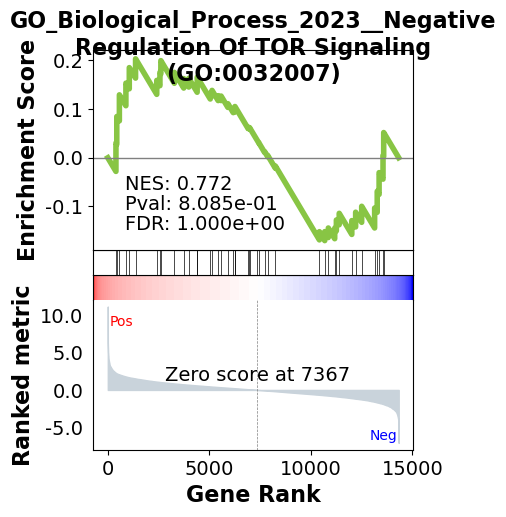

negative: 
 Term      GO_Biological_Process_2023__Negative Regulatio...
Tag %                                                  3/20
Gene %                                                9.55%
Name: 1857, dtype: object


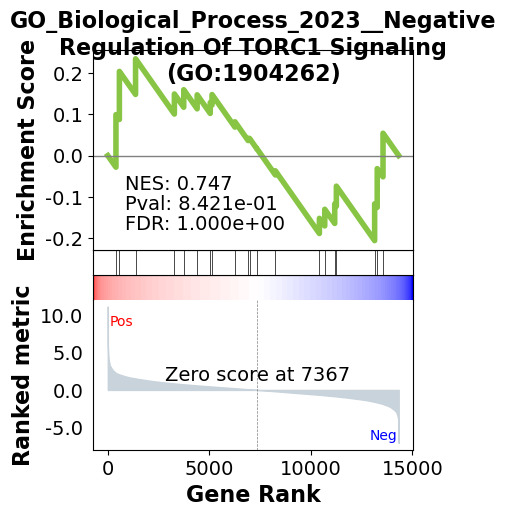

negative: 
 Term      GO_Biological_Process_2023__Regulation Of TORC...
Tag %                                                 17/42
Gene %                                               25.43%
Name: 1564, dtype: object


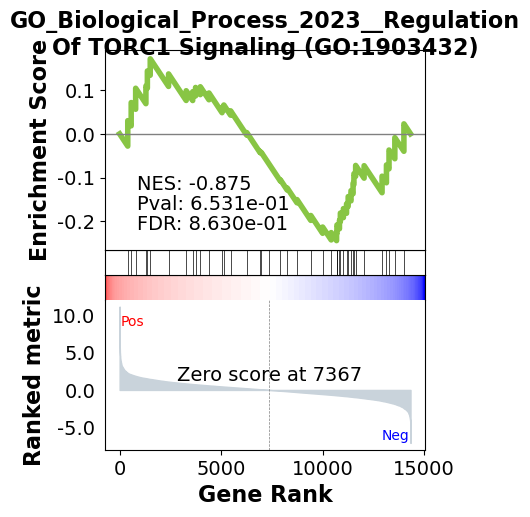

negative: 
 Term      GO_Biological_Process_2023__Positive Regulatio...
Tag %                                                 10/24
Gene %                                               25.30%
Name: 1501, dtype: object


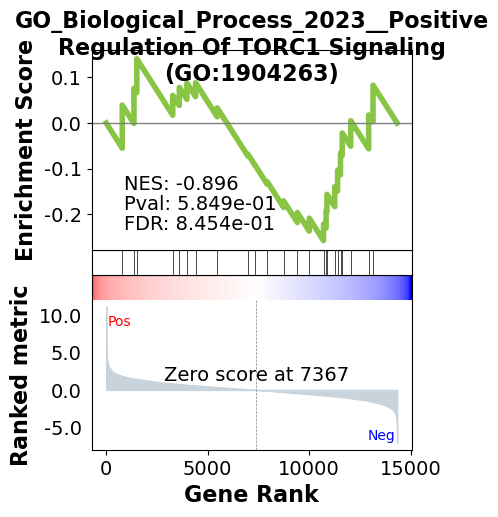

In [116]:
# GO_Biological_Process_2023 MTOR
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                 gene_sets = ['GO_Biological_Process_2023'],
                 seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

mtor_terms = terms[terms.str.contains('TOR')]
mtor_terms_index = mtor_terms.index

#only mtor
for i in range(len(mtor_terms)):
    mtor_term_index = mtor_terms_index[i]
    print('negative: \n', pre_res.res2d.iloc[mtor_term_index,[1,7,8]])

    pre_res.plot(terms = terms[mtor_term_index])
    plt.show()
    plt.close()

2024-03-18 14:27:27,461 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Biological_Process_2023__TOR Signaling (GO:...
Tag %                                                  6/27
Gene %                                               12.98%
Name: 1250, dtype: object


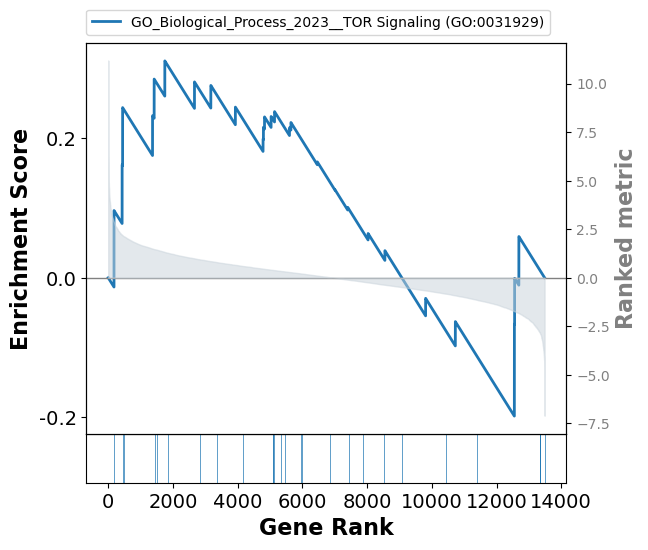

In [38]:
# GO_Biological_Process_2023 MTOR
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

#only stress granules
print('negative: \n', pre_res.res2d.iloc[1250,[1,7,8]])
pre_res.plot(terms = terms[m_tor])
plt.show()
plt.close()

### KEGG

2024-03-14 13:59:12,149 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


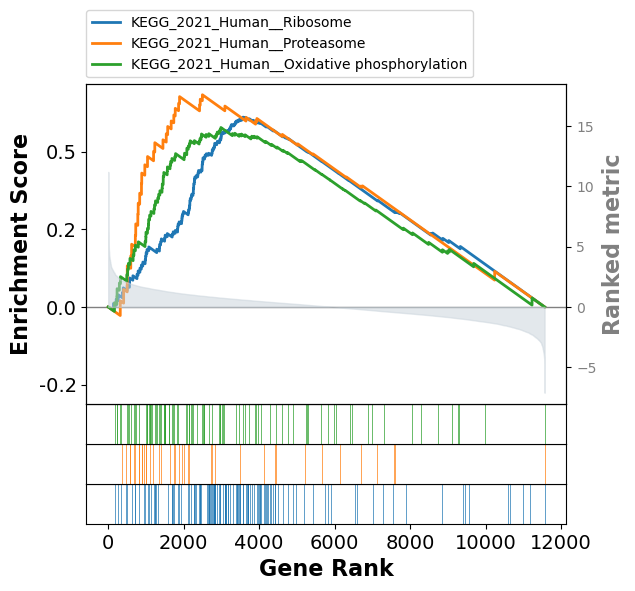

nothing interesting


In [79]:
# KEGG_2021_Human
pre_res = gseapy.prerank(rnk = ranking.set_index("Symbol", drop=True),
                     gene_sets = ['KEGG_2021_Human'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('nothing interesting')